In [1]:
#path to our image folder
imagePath=r"C:\Users\Patrick\Documents\TU\2019S\ML\ML_Exercise3\ML_Exercise3\data\FIDS30"
# Find all images in that folder
import glob, os
os.chdir(imagePath)
fileNames = glob.glob("*/*.jpg")
numberOfFiles=len(fileNames)
targetLabels=[]

print("Found " + str(numberOfFiles) + " files\n")

# The first step - create the ground truth (label assignment, target, ...) 
# For that, iterate over the files, and obtain the class label for each file
# Basically, the class name is in the full path name, so we simply use that
for fileName in fileNames:
    pathSepIndex = fileName.index("\\")
    targetLabels.append(fileName[:pathSepIndex])

# sk-learn can only handle labels in numeric format - we have them as strings though...
# Thus we use the LabelEncoder, which does a mapping to Integer numbers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(targetLabels) # this basically finds all unique class names, and assigns them to the numbers
print("Found the following classes: " + str(list(le.classes_)))

# now we transform our labels to integers
target = le.transform(targetLabels) 
print("Transformed labels (first elements: " + str(target[0:150]))

# If we want to find again the label for an integer value, we can do something like this:
# print list(le.inverse_transform([0, 18, 1]))

print("... done label encoding")

Found 971 files

Found the following classes: ['acerolas', 'apples', 'apricots', 'avocados', 'bananas', 'blackberries', 'blueberries', 'cantaloupes', 'cherries', 'coconuts', 'figs', 'grapefruits', 'grapes', 'guava', 'kiwifruit', 'lemons', 'limes', 'mangos', 'olives', 'oranges', 'passionfruit', 'peaches', 'pears', 'pineapples', 'plums', 'pomegranates', 'raspberries', 'strawberries', 'tomatoes', 'watermelons']
Transformed labels (first elements: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4]
... done label encoding


Showing demo feature extraction on image C:\Users\Patrick\Documents\TU\2019S\ML\ML_Exercise3\ML_Exercise3\data\FIDS30\acerolas\10.jpg


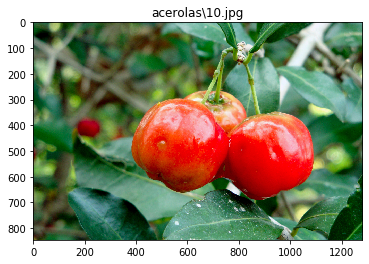

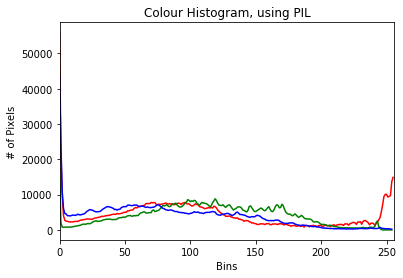

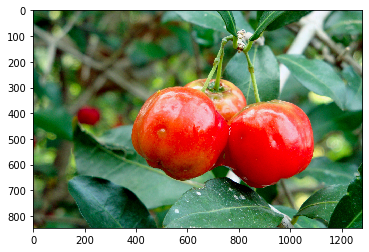

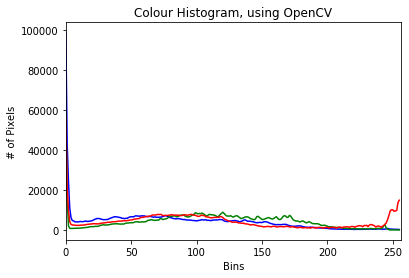

In [2]:
# Before we do actual feature extaction just for curiosity, let's look at one image, to illustrate what we are going to do

# import the necessary packages
from matplotlib import pyplot as plt

%matplotlib inline

# import libraries for image feature extraction
import numpy as np
import cv2
# For OpenCV (need Version 2.4+) for Python 2.7, on Ubuntu Linux, just "sudo apt install python-opencv"
# In other OS, that might be different.

from PIL import Image

demoImageName = fileNames[1]
#demoImage = imagePath + "\\" + demoImageName
#demoImage = imagePath + os.path.sep + demoImageName
demoImage = os.path.join(imagePath, demoImageName)
print("Showing demo feature extraction on image " + demoImage)

# load the image & plot it
imagePIL = Image.open(demoImage)
imgplot = plt.imshow(imagePIL)
plt.title(demoImageName)

# now we compute a colour histogram using the histogram function in pillow
# This gives us one histogram with 768 values, which is 3 x 256 values for each colour
# For each colour channel, each value repesent the count how many pixels have that colour intensity
featureVector=imagePIL.histogram()

# We plot this histogram
plt.figure()
plt.plot(featureVector[:256], 'r')
plt.plot(featureVector[257:512], 'g')
plt.plot(featureVector[513:], 'b')
plt.xlim([0, 256])
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.title("Colour Histogram, using PIL")

# An alternative is to use open CV
imageOpenCV = cv2.imread(demoImage)

# OpenCV is a bit weird, because it changes the channel order, it stores them as BGR, instead of RGB
# So if we want to display the image, we have to invert it
plt.figure()
plt.imshow(cv2.cvtColor(imageOpenCV, cv2.COLOR_BGR2RGB))

chans = cv2.split(imageOpenCV) # split the image in the different channels (RGB, but in open CV, it is BGR, actually..)
colors = ("b", "g", "r")
plt.figure()
plt.title("Colour Histogram, using OpenCV")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
featuresOpenCV = []

# loop over the image channels
for (chan, color) in zip(chans, colors):
    # create a histogram for the current channel and add it to the resulting histograms array (of arrays)
    # We can specifiy here in the 4th argument how many bins we want - 256 means the same as in the previous histogram
    histOpenCV = cv2.calcHist([chan], [0], None, [256], [0, 256])
    featuresOpenCV.extend(histOpenCV)

    # plot the histogram of the current colour
    plt.plot(histOpenCV, color = color)
    plt.xlim([0, 256])
    
# Now we have a 2D-array - 256 values for each of 3 colour channels.
# To input this into our machine learning, we need to "flatten" the features into one larger 1D array
# the size of this will be 3 x 256 = 768 values
featureVectorOpenCV = np.array(featuresOpenCV).flatten()


# show all the plots
plt.show()

In [3]:
# so NOW we actually extract features from our images
import datetime

print("Extracting features using PIL/PILLOW" + " (" + str(datetime.datetime.now()) + ")")

# The simplest approach is via the PIL/PILLOW package; here we get a histogram over each RGB channel
# Note: this doesn't really represent colours, as a colour is made up of the combination of the three channels!
data=[]
for index, fileName in enumerate(fileNames):
    imagePIL = Image.open(os.path.join(imagePath, fileName))
    # Not all images in our dataset are in RGB color scheme (e.g. indexed colours)
    # We need to make sure that they are RGB , otherwise we can't expect to have exactly three RGB channels..
    imagePIL = imagePIL.convert('RGB')     
    featureVector=imagePIL.histogram()
    
    if (len(featureVector) != 768): # just a sanity check; with the transformation to RGB, this should never happen
        print("Unexpected length of feature vector: " + str(len(featureVector)) + " in file: " + fileName)

    data.append((featureVector))

    
# Next, we extract a few more features using OpenCV

print("Extracting features using OpenCV" + " (" + str(datetime.datetime.now()) + ")")
dataOpenCV_1D=[]
dataOpenCV_2D=[]
dataOpenCV_3D=[]

# use our own simple function to flatten the 2D arrays
flatten = lambda l: [item for sublist in l for item in sublist]

for fileName in fileNames:

    # the easiest way would to do the following:
    # imageOpenCV = cv2.imread(imagePath + fileName)

    # However, we have the same issue as before, and it is more difficult in OpenCV to convert to an RGB image
    # Thus we do this using PIL, and then convert to OpenCV ....
    imagePIL = Image.open(os.path.join(imagePath, fileName))
    imagePIL = imagePIL.convert('RGB')
    imageOpenCV = np.array(imagePIL) 
    # Convert RGB to BGR 
    imageOpenCV = imageOpenCV[:, :, ::-1].copy() 

    # Now we split the image in the three channels, B / G / R
    chans = cv2.split(imageOpenCV)
    colors = ("b", "g", "r")

    # First we do also features per channel, but this time, we aggregate them into a smaller number of bins
    # I.e. we do not have 256 values per channel, but less
    featuresOpenCV_1D = []
    bins_1D=64
    for (chan, color) in zip(chans, colors): # we compute the histogram over each channel
        histOpenCV = cv2.calcHist([chan], [0], None, [bins_1D], [0, 256])
        featuresOpenCV_1D.extend(histOpenCV)
    featureVectorOpenCV_1D = flatten(featuresOpenCV_1D) # and append this to our feature vector
    
    dataOpenCV_1D.append(featureVectorOpenCV_1D) # now we append the feature vector to the dataset so far

    if (len(featureVectorOpenCV_1D) != bins_1D*3): # sanity check, in case we had a wrong number of channels...
        print("Unexpected length of feature vector: " + str(len(featureVectorOpenCV_1D)) + " in file: " + fileName)

    # Next - features that look at two channels at the same time
    # E.g. we look at when green and blue have both "high values"
    # We reduce the size of bins further, to not have a too long feature vector
    featuresOpenCV_2D = []
    bins2D=16
    # look at all combinations of channels (R & B, R & G, B & G)
    featuresOpenCV_2D.extend(cv2.calcHist([chans[1], chans[0]], [0, 1], None, [bins2D, bins2D], [0, 256, 0, 256]))
    featuresOpenCV_2D.extend(cv2.calcHist([chans[1], chans[2]], [0, 1], None, [bins2D, bins2D], [0, 256, 0, 256]))
    featuresOpenCV_2D.extend(cv2.calcHist([chans[0], chans[2]], [0, 1], None, [bins2D, bins2D], [0, 256, 0, 256]))
    # and add that to our dataset
    featureVectorOpenCV_2D = flatten(featuresOpenCV_2D)
    dataOpenCV_2D.append(featureVectorOpenCV_2D)

    # finally, we look at all three channels at the same time.
    # We further reduce our bin size, because otherwise, this would become very large...
    featuresOpenCV_3D = cv2.calcHist([imageOpenCV], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    # append to our dataset
    featureVectorOpenCV_3D = featuresOpenCV_3D.flatten()
    dataOpenCV_3D.append(featureVectorOpenCV_3D)

        
print(".... done" + " (" + str(datetime.datetime.now()) + ")")

Extracting features using PIL/PILLOW (2019-07-22 13:46:27.034109)
Extracting features using OpenCV (2019-07-22 13:46:50.079204)
.... done (2019-07-22 13:47:48.423596)


In [5]:
# And now we finally classify 
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import pandas as pd

In [19]:
# these are our feature sets; we will use each of them individually to train classifiers
trainingSets = [data, dataOpenCV_1D, dataOpenCV_2D, dataOpenCV_3D]

# set up a number of classifiers
classifiers = [("Kneighbors", neighbors.KNeighborsClassifier()),
               ('GaussianNB', naive_bayes.GaussianNB()), 
               ('DecisionTree', tree.DecisionTreeClassifier()),
               ('RandomForest', ensemble.RandomForestClassifier()),
               ('RandomForest_OPT', ensemble.RandomForestClassifier(n_estimators=300)),
               ('SVC', svm.SVC()),
               ('MLP', neural_network.MLPClassifier()),
               ('MLP_OPT', neural_network.MLPClassifier(alpha=0.03, max_iter=500))
              ]

# Now iterate over the datasets & classifiers, and train...
arr = []
for iindex, train in enumerate(trainingSets):
    print("\n")
    for jindex, classifier_tuple in enumerate(classifiers):
        if iindex == 0:
            arr.append([])
        print(classifier_tuple[0]) 
        scores = cross_val_score(classifier_tuple[1], train, target, cv=10)
        #print(cross_val_score(classifier, train, target, cv=3))
        print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
        arr[jindex].append(scores.mean())



Kneighbors
Accuracy: 0.10 (+/- 0.05)
GaussianNB
Accuracy: 0.07 (+/- 0.04)
DecisionTree
Accuracy: 0.16 (+/- 0.08)
RandomForest
Accuracy: 0.22 (+/- 0.07)
RandomForest_OPT
Accuracy: 0.30 (+/- 0.08)
SVC
Accuracy: 0.05 (+/- 0.01)
MLP
Accuracy: 0.15 (+/- 0.08)
MLP_OPT
Accuracy: 0.15 (+/- 0.10)


Kneighbors
Accuracy: 0.11 (+/- 0.05)
GaussianNB
Accuracy: 0.07 (+/- 0.05)
DecisionTree
Accuracy: 0.16 (+/- 0.05)
RandomForest
Accuracy: 0.22 (+/- 0.07)
RandomForest_OPT
Accuracy: 0.29 (+/- 0.07)
SVC
Accuracy: 0.05 (+/- 0.01)
MLP
Accuracy: 0.22 (+/- 0.12)
MLP_OPT
Accuracy: 0.23 (+/- 0.07)


Kneighbors
Accuracy: 0.16 (+/- 0.07)
GaussianNB
Accuracy: 0.21 (+/- 0.06)
DecisionTree
Accuracy: 0.28 (+/- 0.12)
RandomForest
Accuracy: 0.35 (+/- 0.08)
RandomForest_OPT
Accuracy: 0.51 (+/- 0.09)
SVC
Accuracy: 0.05 (+/- 0.01)
MLP
Accuracy: 0.34 (+/- 0.11)
MLP_OPT
Accuracy: 0.33 (+/- 0.14)


Kneighbors
Accuracy: 0.19 (+/- 0.07)
GaussianNB
Accuracy: 0.25 (+/- 0.08)
DecisionTree
Accuracy: 0.31 (+/- 0.06)
RandomForest

c:\users\patrick\documents\tu\2019s\ml\ml_exercise3\ml_exercise3\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\patrick\documents\tu\2019s\ml\ml_exercise3\ml_exercise3\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\patrick\documents\tu\2019s\ml\ml_exercise3\ml_exercise3\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\patrick\documents\tu\2019s\ml\ml_exercise3\ml_exercise3\venv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators wil

In [20]:
classifier_names = [clf_tuple[0] for clf_tuple in classifiers]
df = pd.DataFrame(data=arr, index=classifier_names,columns=['data', '1D', '2D', '3D'])

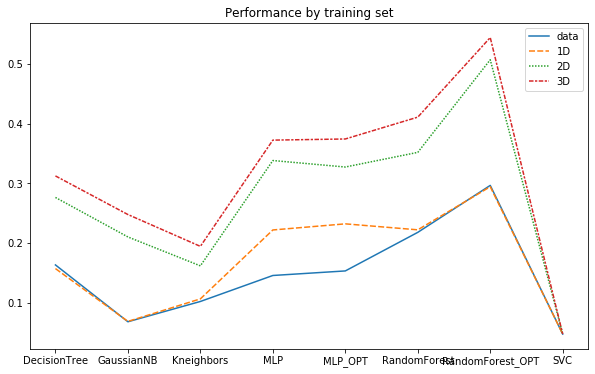

In [21]:
import seaborn as sns
_, ax = plt.subplots(figsize=(10, 6))
plt.title('Performance by training set')
sns.lineplot(data=df, ax=ax)

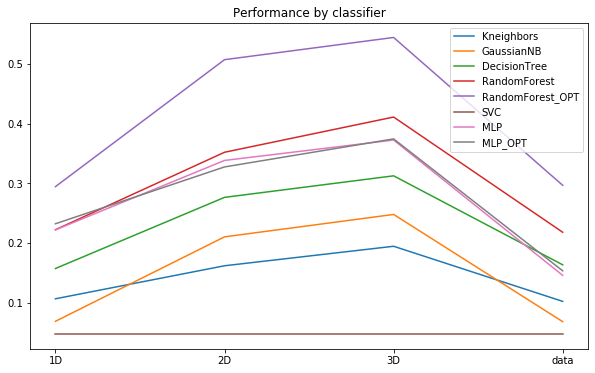

In [26]:
_, ax = plt.subplots(figsize=(10, 6))
plt.title('Performance by classifier')
sns.lineplot(data=df.T, ax=ax, dashes=False)

In [6]:
# tune MLP and RandomForest using GridSearch
from sklearn.model_selection import GridSearchCV
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [13]:
rfclf_param_grid = {
  "n_estimators": [10, 100, 300],
  "max_depth": [5, 7, None],
  "max_features": [5, "auto"],
  }
rfclf = ensemble.RandomForestClassifier()
rfclf_grid_search = GridSearchCV(rfclf, param_grid=rfclf_param_grid, cv=10, n_jobs=1)
rfclf_grid_search.fit(dataOpenCV_3D, target)
report(rfclf_grid_search.cv_results_) 

c:\users\patrick\documents\tu\2019s\ml\ml_exercise3\ml_exercise3\venv\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Model with rank: 1
Mean validation score: 0.547 (std: 0.037)
Parameters: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 300}

Model with rank: 2
Mean validation score: 0.541 (std: 0.039)
Parameters: {'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}

Model with rank: 3
Mean validation score: 0.523 (std: 0.038)
Parameters: {'max_depth': None, 'max_features': 5, 'n_estimators': 300}



In [18]:
mlpclf_param_grid = {"hidden_layer_sizes": [(100,), (100,30), (50,50)], #, (30, 30, 20), smaller ones e.g. 10; 15; 15,15 worse
              "activation": [ "relu"], #tanh worse
              "solver": ["adam"], #lbfgs worse
              "alpha": [0.03], #0.0001, 0.005, 
              "max_iter": [200, 500]} # 100 worse, does not converge
mlpclf = neural_network.MLPClassifier()
mlpclf_grid_search = GridSearchCV(mlpclf, param_grid=mlpclf_param_grid, cv=10, n_jobs=1)
mlpclf_grid_search.fit(dataOpenCV_3D, target)
report(mlpclf_grid_search.cv_results_) 

c:\users\patrick\documents\tu\2019s\ml\ml_exercise3\ml_exercise3\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\patrick\documents\tu\2019s\ml\ml_exercise3\ml_exercise3\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\patrick\documents\tu\2019s\ml\ml_exercise3\ml_exercise3\venv\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\patrick\documents\tu\2019s\ml\ml_exercise3\ml_exercise3\venv\lib\site-packages\sklearn\neural_net

Model with rank: 1
Mean validation score: 0.364 (std: 0.039)
Parameters: {'activation': 'relu', 'alpha': 0.03, 'hidden_layer_sizes': (100,), 'max_iter': 500, 'solver': 'adam'}

Model with rank: 2
Mean validation score: 0.361 (std: 0.039)
Parameters: {'activation': 'relu', 'alpha': 0.03, 'hidden_layer_sizes': (100,), 'max_iter': 200, 'solver': 'adam'}

Model with rank: 3
Mean validation score: 0.228 (std: 0.073)
Parameters: {'activation': 'relu', 'alpha': 0.03, 'hidden_layer_sizes': (50, 50), 'max_iter': 200, 'solver': 'adam'}

Model with rank: 3
Mean validation score: 0.228 (std: 0.042)
Parameters: {'activation': 'relu', 'alpha': 0.03, 'hidden_layer_sizes': (50, 50), 'max_iter': 500, 'solver': 'adam'}

